In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

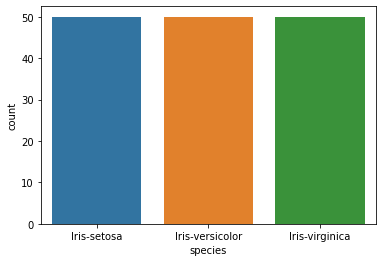

In [21]:
sns.countplot(x='species',data=df)

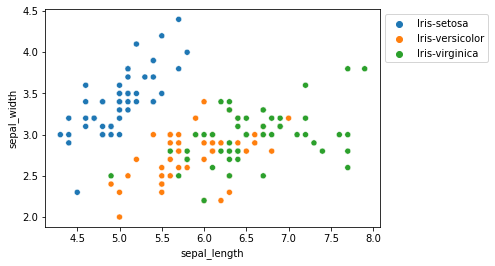

In [24]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

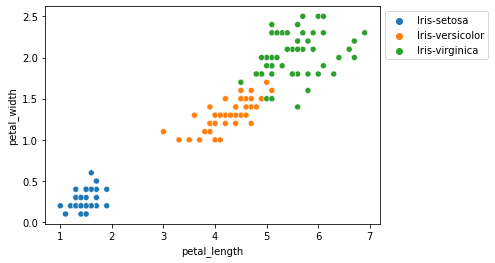

In [25]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

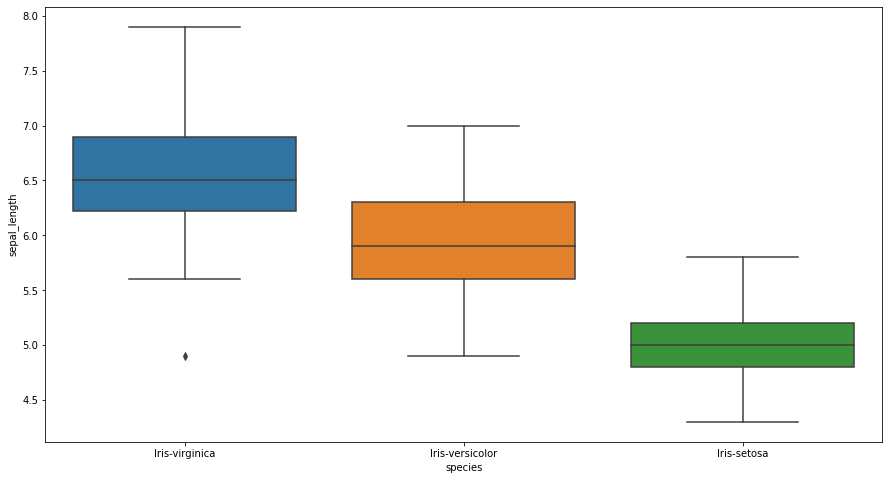

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_length',data=df.sort_values('sepal_length',ascending=False))

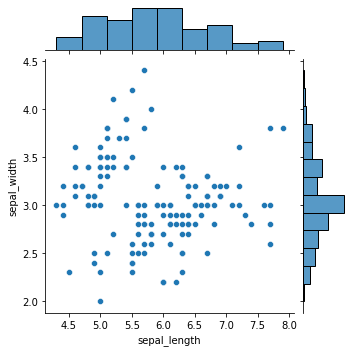

In [29]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=5)

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


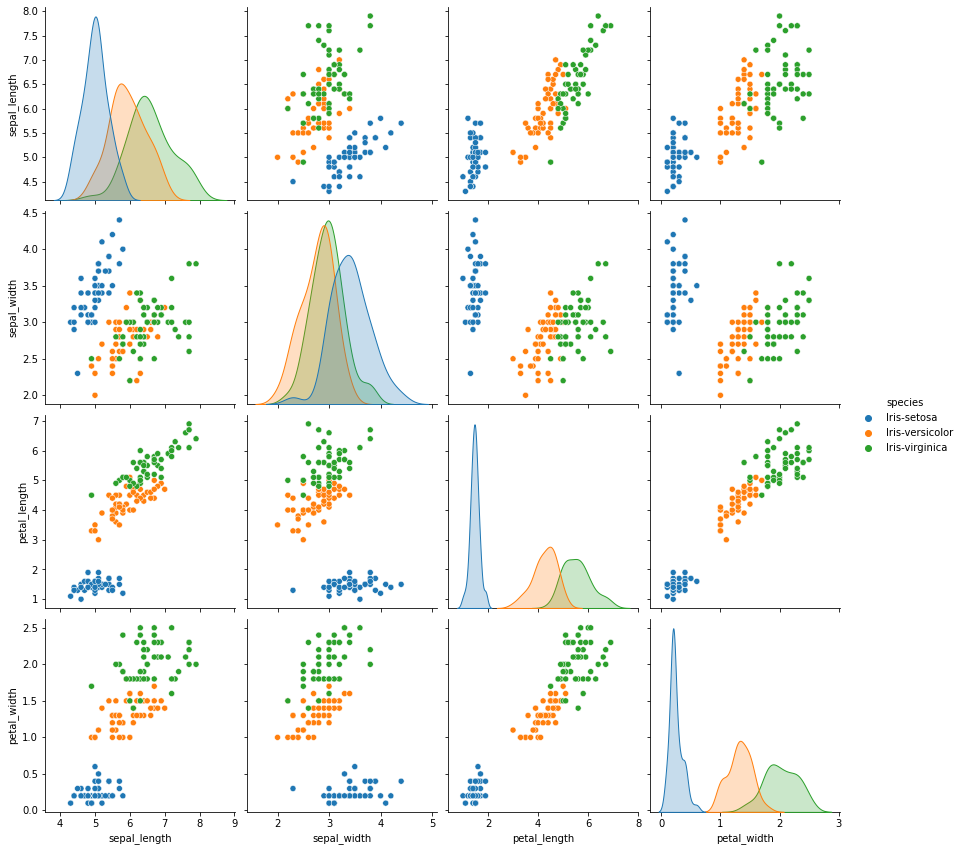

In [30]:
sns.pairplot(df, hue="species", size=3)

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

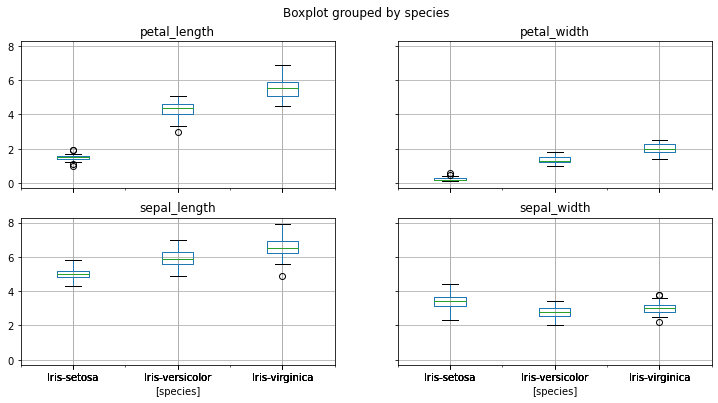

In [31]:
df.boxplot(by="species", figsize=(12, 6))

<AxesSubplot:>

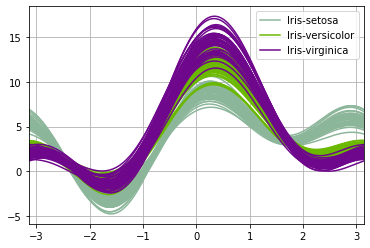

In [32]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "species")

<Figure size 1080x1080 with 0 Axes>

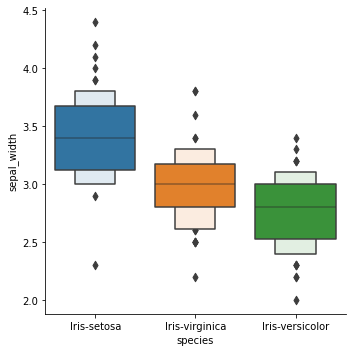

In [33]:
plt.figure(figsize=(15,15))
sns.catplot(x='species',y='sepal_width',data=df.sort_values('sepal_width',ascending=False),kind='boxen')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

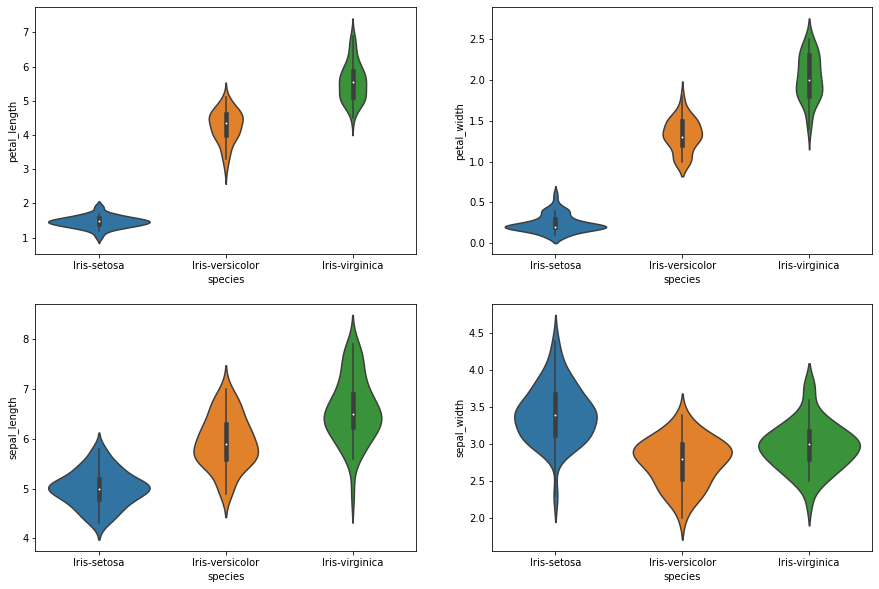

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

In [35]:
X=df.drop('species',axis=1)
y=df['species']

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [38]:
df['species'] = pd.Categorical(df.species)
df['species'] = df.species.cat.codes
y = to_categorical(df.species)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [40]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 61ms/step - loss: 1.4227 - accuracy: 0.3333 - val_loss: 1.2895 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 12ms/step - loss: 1.2266 - accuracy: 0.3333 - val_loss: 1.1437 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 20ms/step - loss: 1.1059 - accuracy: 0.4190 - val_loss: 1.0674 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 14ms/step - loss: 1.0417 - accuracy: 0.3333 - val_loss: 1.0347 - val_accuracy: 0.3333
Epoch 5/45
4/4 [==============================] - 0s 17ms/step - loss: 1.0155 - accuracy: 0.3333 - val_loss: 0.9996 - val_accuracy: 0.3333
Epoch 6/45
4/4 [==============================] - 0s 17ms/step - loss: 0.9793 - accuracy: 0.3333 - val_loss: 0.9536 - val_accuracy: 0.5556
Epoch 7/45
4/4 [==============================] - 0s 16ms/step - loss: 0.9337 - accuracy: 0.6286 - val_loss: 0.9056 - val_accuracy: 0.6667
Epoch 8/45
4/4 [===========

In [44]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.9556


[0.40885165333747864, 0.9555555582046509]

In [45]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 82ms/step
[[0.02099274 0.502563   0.47644415]
 [0.8587425  0.12296221 0.01829525]
 [0.08372794 0.5750785  0.34119365]
 [0.04698382 0.5787728  0.37424347]
 [0.91530305 0.07429579 0.01040121]
 [0.00428065 0.36672673 0.6289926 ]
 [0.02036813 0.49061558 0.48901623]
 [0.02678972 0.5232328  0.4499774 ]
 [0.00586597 0.3792798  0.6148543 ]
 [0.00554262 0.32763106 0.6668263 ]]


In [46]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[1 0 1 1 0 2 1 1 2 2]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [47]:
history.history['accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.41904762387275696,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.6285714507102966,
 0.6761904954910278,
 0.7904762029647827,
 0.8476190567016602,
 0.8190476298332214,
 0.7809523940086365,
 0.7523809671401978,
 0.7809523940086365,
 0.8190476298332214,
 0.8190476298332214,
 0.723809540271759,
 0.7047619223594666,
 0.6857143044471741,
 0.6952381134033203,
 0.8285714387893677,
 0.9333333373069763,
 0.9523809552192688,
 0.9142857193946838,
 0.8095238208770752,
 0.7142857313156128,
 0.723809540271759,
 0.7523809671401978,
 0.8476190567016602,
 0.9428571462631226,
 0.9523809552192688,
 0.9714285731315613,
 0.9238095283508301,
 0.8857142925262451,
 0.8857142925262451,
 0.9047619104385376,
 0.9428571462631226,
 0.9523809552192688,
 0.9523809552192688,
 0.961904764175415,
 0.9047619104385376,
 0.9142857193946838,
 0.961904764175415,
 0.9523809552192688,
 0.961904764175415]

In [48]:
history.history['val_accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.5555555820465088,
 0.6666666865348816,
 0.6888889074325562,
 0.8222222328186035,
 0.800000011920929,
 0.7777777910232544,
 0.7111111283302307,
 0.7555555701255798,
 0.7777777910232544,
 0.800000011920929,
 0.7333333492279053,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7777777910232544,
 0.8888888955116272,
 0.9777777791023254,
 0.9111111164093018,
 0.7777777910232544,
 0.7333333492279053,
 0.6888889074325562,
 0.7333333492279053,
 0.7777777910232544,
 0.8666666746139526,
 0.9777777791023254,
 0.9777777791023254,
 0.9111111164093018,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.8666666746139526,
 0.9777777791023254,
 0.9777777791023254,
 0.9555555582046509,
 0.9333333373069763,
 0.8222222328186035,
 0.8888888955116272,
 0.9777777791023254,
 0.9777777791023254,
 0.9555555582046509]

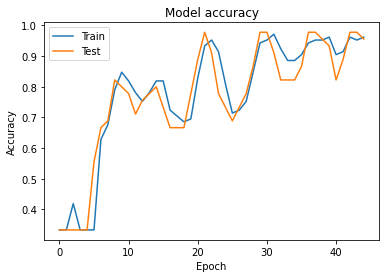

In [49]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()